# <center>Clickbait detection<center>

## Introduction

Clickbaits are online articles with deliberately designed misleading titles to lure more and more readers to
open the intended web page. Clickbaits are used to tempt visitors to click on a particular link either to
monetize the landing page or to spread false news for sensationalization. The presence of clickbaits on any
news aggregator portal may lead to unpleasant experiences for readers. Automatic detection of clickbait
headlines from news headlines has been a challenging issue for the machine learning community.

## Data

* dataset: https://drive.google.com/drive/folders/1aPzn_Qu4tLx9TWfF1Zqa2uYWO22P9XCK?usp=sharing - 500 instances
* original dataset from Kaggle: https://www.kaggle.com/datasets/amananandrai/clickbait-dataset - 32000 instances

## Assignment

This project aims to develop the best classifier for detecting clickbait titles with **limitated data (500 instances)**.

## Importing libraries

Main libraries: numpy, pandas, nltk, scikit-learn. Also using matplotlib,seaborn and wordcloud for visualizations and request for getting a more useful list of stopwords.

In [1]:
import numpy as np 
import pandas as pd
import nltk
#from nltk.corpus import stopwords
from nltk.probability import FreqDist
import string as s
import re

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from wordcloud import WordCloud # for viz

import seaborn as sns

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

#nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
import requests # for getting stopwords list
import warnings # ignoring warning

#### Loading

In [2]:
data= pd.read_csv(r'C:\Users\Asus\Desktop\M\AII\text_mining/clickbait.csv')
data.drop('Unnamed: 0', axis = 1, inplace = True)
data.head(7)

,text,label
0,"Eva Hassett, VP of Savarino Construction Servi...",0
1,Kylie Jenner Told Ellen DeGeneres She's Proud ...,1
2,Australian rules football: 2010 Gippsland Foot...,0
3,Supercross: Stewart wins 4th consecutive Monst...,0
4,Wikinews interviews Prince Christopher I of th...,0
5,This Woman Is Posting Heartbreaking Stories Ab...,1
6,"Jordanian king dissolves parliament, calls for...",0


#### Examples & number of values

In [3]:
print("Clickbait Example - ", data.iloc[9]['text'])
print()
print("not clickbait Example - ", data.iloc[6]['text'])

Clickbait Example -  19 Times Kendall Jenner And Cara Delevingne's Friendship Was So Perfect It Was Actually Painful

not clickbait Example -  Jordanian king dissolves parliament, calls for general election two years ahead of schedule


In [4]:
data.label.value_counts()

0    250
1    250
Name: label, dtype: int64

#### Spliting into 90% train and 10% test

In [5]:
x = data['text']
y = data['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=50) #random state

#### Train and test data quality assessment

Due to the limited amount of instances I preferred to train the model on 90% of data

In [6]:
print("No. of elements in training set - ", x_train.size)
print("No. of elements in testing set - ", x_test.size)

No. of elements in training set -  450
No. of elements in testing set -  50


In [7]:
print(x_train.head(2))
print()
print(x_test.head(2))

382    US government reports decline in teen birth ra...
140    Taylor Swift And Haim Danced Flawlessly While ...
Name: text, dtype: object

331    The Romanian Photographer Who Documents Beauty...
374    University of Missouri Hospital in lockdown af...
Name: text, dtype: object


In [8]:
print(x_test.head(2))
print()
print(y_test.head(2))

331    The Romanian Photographer Who Documents Beauty...
374    University of Missouri Hospital in lockdown af...
Name: text, dtype: object

331    1
374    0
Name: label, dtype: int64


## Pre-processing

#### Creating useful functions

* Repleacing everything that is not a-zA-Z with ' '
* Replacing numbers
* Removing extra spaces

In [9]:
def _tokenize_(lst):
    new_lst=[]
    for i in lst:
        for j in i:
            i = re.sub('[^^a-zA-Z]', ' ', i) # repleace everything that is not a-zA-Z..numbers also
            i = i.strip() # remove extra spaces
        new_lst.append(i)
    return new_lst

Removing stopwords function

There are only 179 words in nltk stopwords list so I have used a much bigger english stopwords list found at link belowe and I 
have used requests library to save words into a new list

In [10]:
# len(stopwords.words('english')) = 179...NLTK stopwords 179
# ~1000 english stopwords
second_stopwords_list = requests.get("https://gist.githubusercontent.com/rg089/35e00abf8941d72d419224cfd5b5925d/raw/12d899b70156fd0041fa9778d657330b024b959c/stopwords.txt").content
stopwords2 = set(second_stopwords_list.decode().splitlines())
stopwords2 = list(stopwords2)

def remove_stopwords2(lst):
    stop2 = stopwords2
    new_lst = []
    for i in lst:
        if i not in stop2:
            new_lst.append(i)
    return new_lst

Lemmatization

* switches any kind of a word to its base root mode
* responsible for grouping different inflected forms of words into the root form, having the same meaning.
* has higher accuracy than stemming 
* preferred for context analysis

In [11]:
lemmatizer=nltk.stem.WordNetLemmatizer()
def lemmatization(lst):
    new_lst=[]
    for i in lst:
        for j in i:
            i = lemmatizer.lemmatize(i)
        new_lst.append(i)
    return new_lst

Applying created functions

In [12]:
x_train = x_train.apply(lambda x:x.lower()) # Lowering
x_test = x_test.apply(lambda x:x.lower())

x_train = x_train.apply(lambda x:x.split()) # split it into words
x_test = x_test.apply(lambda x:x.split())

x_train=x_train.apply(remove_stopwords2) # removing stopwords
x_test=x_test.apply(remove_stopwords2)  

x_train=x_train.apply(lemmatization) # lematization
x_test=x_test.apply(lemmatization) 

x_train=x_train.apply(_tokenize_) # repleace everything that is not a-zA-Z..numbers also
x_test=x_test.apply(_tokenize_)

In [13]:
x_train = x_train.apply(lambda x: ''.join(i+' ' for i in x))
x_test = x_test.apply(lambda x: ''.join(i+' ' for i in x))

## Visualization

**World Cloud of words used in clickbait headlines**

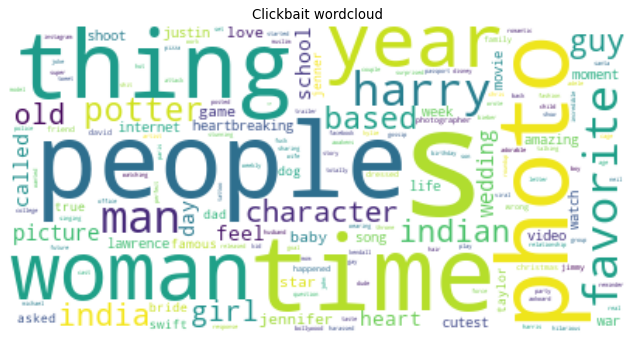

In [14]:
clickbait = data.sort_values(by = 'label')[250:]

clickbait['text'] = clickbait['text'].apply(lambda x:x.lower())
clickbait['text'] = clickbait['text'].apply(lambda x:x.split())
clickbait['text'] = clickbait['text'].apply(remove_stopwords2)
clickbait['text'] = clickbait['text'].apply(lemmatization)
clickbait['text'] = clickbait['text'].apply(_tokenize_)
mylist = clickbait['text'].to_list()
clickbait_text = []
for listt in mylist:
    for word in listt:
        if word != '':
            clickbait_text.append(word)
        else:
            continue
            
            
word_cloud_bait = WordCloud(collocations = False, background_color = 'white').generate(" ".join(clickbait_text))

figure(figsize=(10, 8), dpi=80)
plt.imshow(word_cloud_bait, interpolation='bilinear')
plt.axis("off")
plt.title('Clickbait wordcloud')
plt.show()

**World Cloud of words used in Non clickbait headlines**

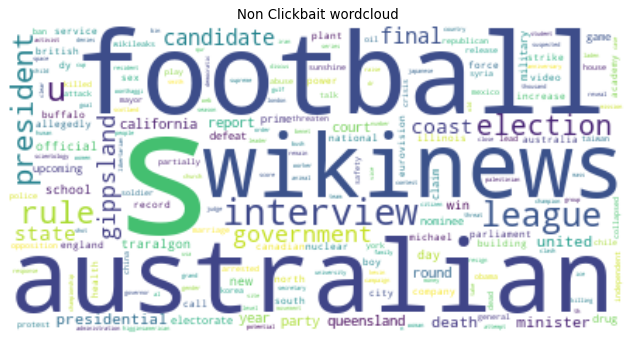

In [15]:
not_clickbait = data.sort_values(by = 'label')[:250]

not_clickbait['text'] = not_clickbait['text'].apply(lambda x:x.lower())
not_clickbait['text'] = not_clickbait['text'].apply(lambda x:x.split())
not_clickbait['text'] = not_clickbait['text'].apply(remove_stopwords2)
not_clickbait['text'] = not_clickbait['text'].apply(lemmatization)
not_clickbait['text'] = not_clickbait['text'].apply(_tokenize_)
mylist2 = not_clickbait['text'].to_list()
not_clickbait_text = []
for listt in mylist2:
    for word in listt:
        if word != '':
            not_clickbait_text.append(word)
        else:
            continue
            
word_cloud_real = WordCloud(collocations = False, background_color = 'white').generate(" ".join(not_clickbait_text))

figure(figsize=(10, 8), dpi=80)
plt.imshow(word_cloud_real, interpolation='bilinear')
plt.axis("off")
plt.title('Non Clickbait wordcloud')
plt.show()

### Clickbaits vs Non clickbaits top used words

In [16]:
click_df = pd.DataFrame(clickbait_text)
click_df = click_df.value_counts().rename_axis('words').reset_index(name='counts')[:5]

non_click_df = pd.DataFrame(not_clickbait_text)
non_click_df = non_click_df.value_counts().rename_axis('words').reset_index(name='counts')[:5]

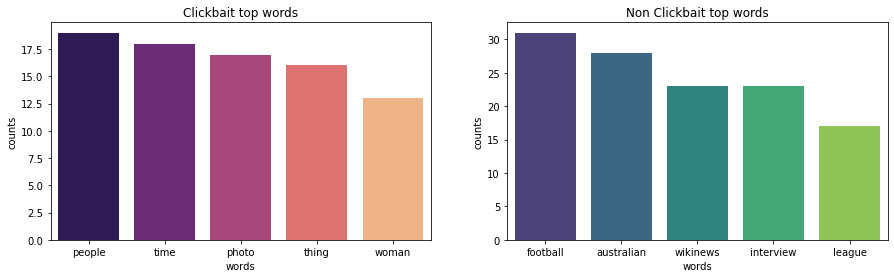

In [17]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15,4))

bait = sns.barplot(x = click_df['words'], y = click_df['counts'], palette = 'magma', ax = axs[0])
bait.set_title('Clickbait top words')

non = sns.barplot(x = non_click_df['words'], y = non_click_df['counts'], palette = 'viridis', ax = axs[1])
non.set_title('Non Clickbait top words')

plt.show()

## Comparing length of clickbait headlines vs Non clickbait headlines

In [18]:
words_num_clickbait = []
for i in range(len(clickbait['text'])):
    words_num_clickbait.append(len(clickbait['text'].iloc[i]))
    
words_num_notclickbait = []
for i in range(len(not_clickbait['text'])):
    words_num_notclickbait.append(len(not_clickbait['text'].iloc[i]))

In [19]:
print('Mean of clickbait headlines length ----> ', np.mean(words_num_clickbait))
print('Mean of Non clickbait headlines length ----> ', np.mean(words_num_notclickbait))

Mean of clickbait headlines length ---->  8.604
Mean of Non clickbait headlines length ---->  10.432


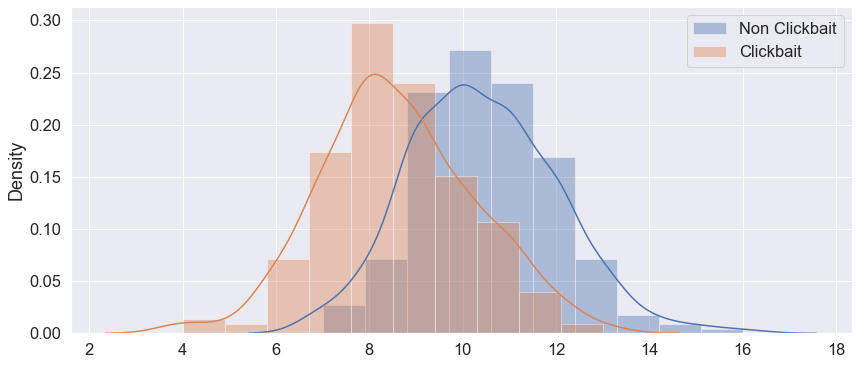

In [128]:
figure = plt.figure(figsize = (14,6))

sns.distplot(words_num_notclickbait, label = 'Non Clickbait', bins=10)
sns.distplot(words_num_clickbait, label = 'Clickbait', bins=10)
plt.legend()
warnings.simplefilter(action='ignore', category=FutureWarning) # ignoring a warning (distplot)

### Using CountVectorizer to convert the text into features

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cov=CountVectorizer(analyzer='word', ngram_range=(1,2), max_features=1000) # ,max_features=22500...
train_1=cov.fit_transform(x_train)
test_1=cov.transform(x_test)

In [38]:
train_arr=train_1.toarray()
test_arr=test_1.toarray()

In [39]:
warnings.simplefilter(action='ignore', category=FutureWarning) # ignorong warning

In [40]:
pd.DataFrame(test_arr[:5], columns=cov.get_feature_names())

,abuse,academy,academy illinois,account,accused,aclu,action,activist,adam,adele,...,xander,xander cage,xxx,xxx return,year,year old,york,you,young,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Defining Naive Bayes Classifier

In [28]:
NB_MN=MultinomialNB()

### Training the model

In [59]:
model = NB_MN.fit(train_arr,y_train)
pred = NB_MN.predict(test_arr)

### Evaluation

In [127]:
from sklearn.metrics import f1_score, accuracy_score

print('first 42 actual labels:')
print('first 42 predicted labels:')
print(y_test.tolist()[:42])
print(pred.tolist()[:42])
print()
print()
print()
print("F1 score of the model")
print(f1_score(y_test,pred))
print("Accuracy of the model")
print(accuracy_score(y_test,pred))
print("Accuracy of the model in percentage")
print(accuracy_score(y_test,pred)*100,"%")

first 42 actual labels:
first 42 predicted labels:
[1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1]
[1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1]



F1 score of the model
0.96875
Accuracy of the model
0.96
Accuracy of the model in percentage
96.0 %


### Confussion Matrix

In [62]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test,pred))

Confusion Matrix
[[17  1]
 [ 1 31]]


Text(0.5, 1.0, 'Clickbait Classification')

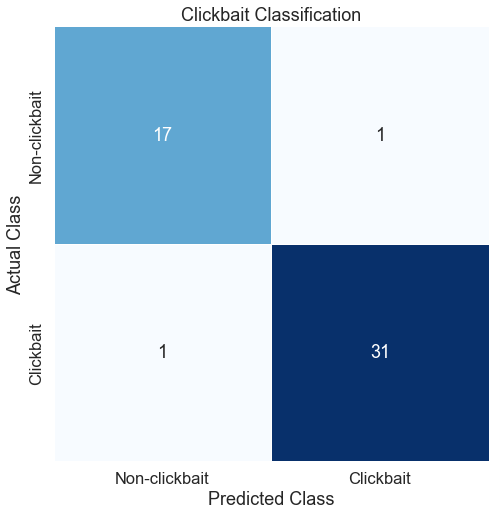

In [64]:
sns.set(font_scale=1.5)
cof=confusion_matrix(y_test, pred)
cof=pd.DataFrame(cof, index=[i for i in range(2)], columns=[i for i in range(2)])
plt.figure(figsize=(8,8))

sns.heatmap(cof, cmap="Blues",linewidths=1, annot=True,square=True,cbar=False,fmt='d',xticklabels=['Non-clickbait','Clickbait'],yticklabels=['Non-clickbait','Clickbait'])
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")

plt.title("Clickbait Classification")

### Cross validation

10 folds cross validation

In [67]:
from sklearn.model_selection import cross_val_score

In [107]:
scores = cross_val_score(model, train_arr,y_train, cv = 10)
scores

array([0.97777778, 0.84444444, 0.95555556, 0.86666667, 0.95555556,
       0.97777778, 0.93333333, 0.93333333, 0.91111111, 0.91111111])

In [193]:
for i in list(scores):
    print(' ----- ', round(i,2), end="")
    
print()
print()
print("mean: " ,round(np.mean(scores), 2))

 -----  0.98 -----  0.84 -----  0.96 -----  0.87 -----  0.96 -----  0.98 -----  0.93 -----  0.93 -----  0.91 -----  0.91

mean:  0.93
